# LASSO
## Variabe Selection to improve our model
### Note: 
* Standardize continuous variables
* also standardize the dummies.
* However, standardizing dummies will eliminate the straightforward interpretability of your coefficients.
* If standardizing isn't done you are essentiall tipping the scales in favor of the continuous variables 
* model selection would be fine but interpretation may be hard
* In addition, standardizing categorical variable will not change its properties of being categorical

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv("X.csv") 
response = pd.read_csv("y.csv")
test = pd.read_csv("test_cleaned.csv")

In [3]:
import numpy as np
def rootmse(y_pred,y_true):
    return np.sqrt((sum(y_pred-y_true)**2)/len(y_true))

In [4]:
from sklearn.linear_model import Lasso

results = []
alpha = np.arange(1e-2,1e-1,5e-3)

scores = []

for i in range(0,len(alpha)):
    lasso_mod = Lasso(alpha=alpha[i], normalize=True, max_iter=1e5)
    lasso_mod.fit(train, response["SalePrice"])
    pred = lasso_mod.predict(train)
    rmse = rootmse(pred, response["SalePrice"])
    results.append(rmse)
    scores.append(lasso_mod.score(train,response["SalePrice"]))

In [5]:
res= pd.DataFrame({"R-Square": scores, "Root Mean Squared Error": results, "alpha":alpha}, index = alpha)
res

,R-Square,Root Mean Squared Error,alpha
0.010,0.911385,1.679898e-08,0.010
0.015,0.911384,1.742704e-08,0.015
0.020,0.911384,3.446993e-08,0.020
0.025,0.911384,7.798874e-09,0.025
0.030,0.911384,1.097574e-09,0.030
0.035,0.911383,2.402468e-09,0.035
0.040,0.911383,9.298892e-09,0.040
0.045,0.911383,6.381174e-08,0.045
0.050,0.911382,1.020744e-08,0.050
0.055,0.911382,3.106135e-08,0.055


In [6]:
res[res["Root Mean Squared Error"] == min(res["Root Mean Squared Error"])]
# alpha = 0.03 gives lowes rmse

,R-Square,Root Mean Squared Error,alpha
0.03,0.911384,1.097574e-09,0.03


In [7]:
res[res["R-Square"] == max(res["R-Square"])]

,R-Square,Root Mean Squared Error,alpha
0.01,0.911385,1.679898e-08,0.01


In [8]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=10, precompute = False, normalize=True, n_jobs = -1).fit(train, response["SalePrice"])

# We can see how lasso uses the l1 penalty to force coefficients to 0 in the plot below

[Text(0.5, 0, 'Penalized Coefficients'),
 Text(0.5, 1.0, 'Penalized Coefficients')]

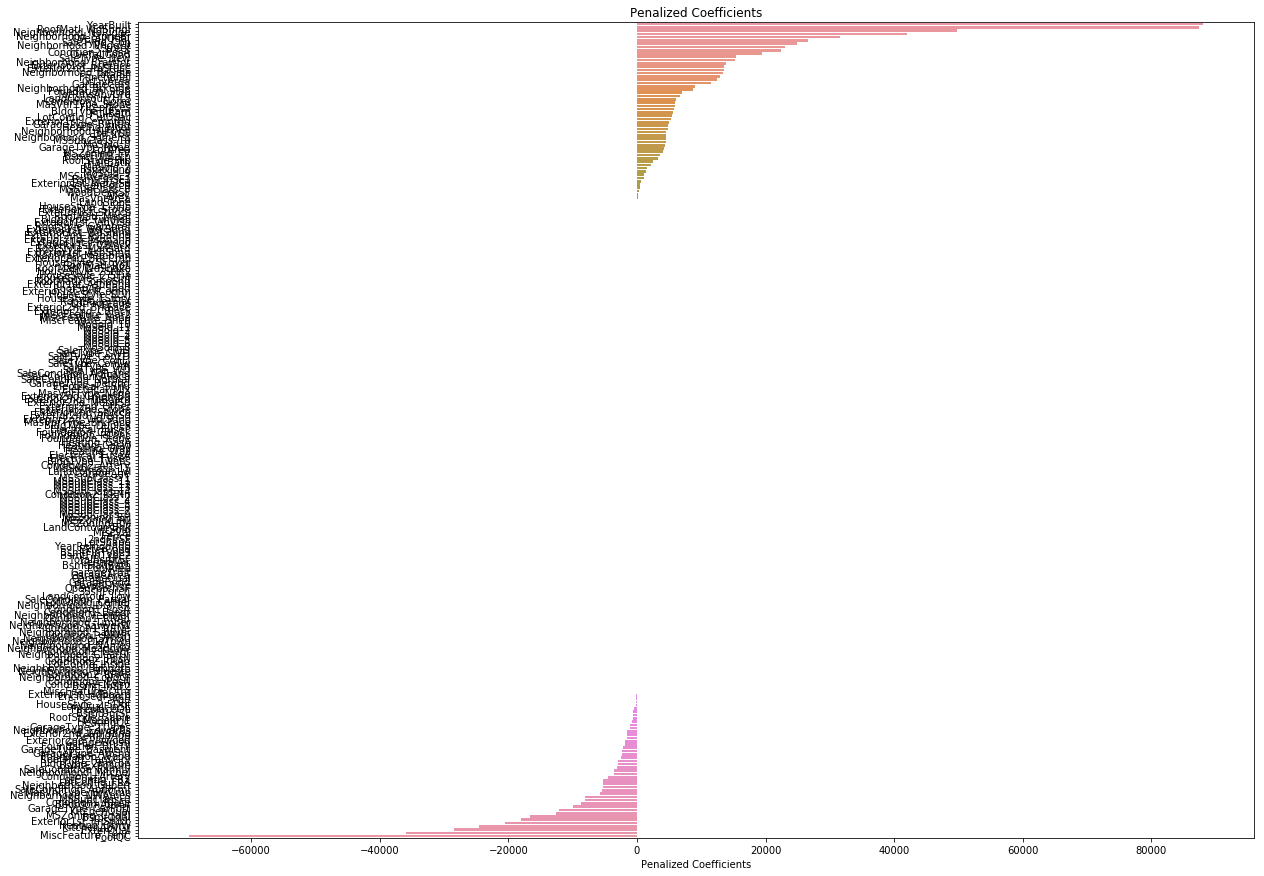

In [16]:
# Since we have way to many predictors lets just look at the ones that are important
# which are the ones that are not penalized
plt.rcParams["figure.figsize"] = (20,15)
coef = pd.DataFrame(np.round_(lasso_cv.coef_, decimals=3),train.columns, columns = ["penalized coefficients"])

# This cutoff is just for visualization since there are too many predictors
coef = coef.sort_values(by = 'penalized coefficients', ascending = False)

ax = sns.barplot(x = 'penalized coefficients', y= coef.index , data=coef)
ax.set(xlabel='Penalized Coefficients', title ='Penalized Coefficients')


# LASSO PATH

In [156]:
from itertools import cycle
from sklearn.linear_model import lasso_path, enet_path
from sklearn import preprocessing
X = train
y = response["SalePrice"]
X_scaled = preprocessing.scale(X)

/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:161: RuntimeWarning: Mean of empty slice
  mean_ = np.nanmean(X, axis)
/Users/chi/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:169: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(Xr, axis=0)
/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:186: RuntimeWarning: Mean of empty slice
  mean_2 = np.nanmean(Xr, axis=0)
/Users/chi/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: 

In [157]:
X_scaled

array([[-0.10435296, -0.16639215,  0.06428243, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.55462332,  0.08035994,  0.06428243, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.03696641,  0.39373885,  0.06428243, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       ...,
       [-0.05665054, -0.0360325 ,  0.06428243, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.03696641,  0.10403276,  0.06428243, ..., -0.11793306,
         0.46586305, -0.3035372 ],
       [ 0.34742859,  0.14789723,  0.06428243, ..., -0.11793306,
         0.46586305, -0.3035372 ]])

In [161]:
np.any(np.isnan(X_scaled))

True

In [162]:
np.all(np.isfinite(X_scaled))

False

In [163]:
np.where(np.isnan(X_scaled))

(array([   0,    1,    2, ..., 1455, 1456, 1457]),
 array([61, 61, 61, ..., 61, 61, 61]))